In [57]:
from rainmaker import rainmaker as rain
import numpy.polynomial.polynomial as poly

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data = rain.rainmaker_notebook_init("tests/testdata/accept_main_table.txt", "Abell 2597")

Cluster found  |  ABELL_2597


In [59]:
data["Tx"]

<Quantity [ 4005.2, 3949.1, 4241.6, 4209.4, 4074.8, 3818.4, 3537.7,
            3230.8, 3170.8, 3018.1, 2582.9, 2360. ] eV>

In [60]:
def rg():
    
    rMpc = (data['Rin'] + data['Rout']) * 0.5
    
    

In [61]:
rMpc = (data['Rin'] + data['Rout']) * 0.5

In [62]:
ln_rMpc = np.log(rMpc.value)

In [63]:
r = (data['Rin'] + data['Rout']) * 0.5
logr = np.log(r.value)
    # this is the NATURAL logarithm, ln

logt = np.log(data['Tx'].value)
logterr = np.log(data['Txerr'] / data['Tx'])

yerror = logterr


In [64]:
#coeffs = poly_fit(logr,logt,deg,yerror=logneerr,/double,status=ok,chisq=chi2)

np.polyfit(logr,logt, deg=3)


array([-0.04032438, -0.45144109, -1.39709395,  7.0244623 ])

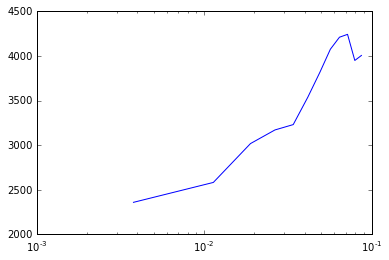

In [77]:
fig, ax = plt.subplots()
ax.plot(r, data['Tx'])
ax.set_xscale('log')

In [66]:
data['Tx']

<Quantity [ 4005.2, 3949.1, 4241.6, 4209.4, 4074.8, 3818.4, 3537.7,
            3230.8, 3170.8, 3018.1, 2582.9, 2360. ] eV>

In [67]:
coeffs, covariance = np.polyfit(logr, logt, deg=3, w=yerror, full=False, cov=True)
chi2 = np.sum((np.polyval(coeffs, logr) - logt)**2)

In [71]:
coeffs2, covariance = poly.polyfit(logr,logt,deg=3, full=False, cov=True)

TypeError: polyfit() got an unexpected keyword argument 'cov'

In [54]:
coeffs

array([-0.03910386, -0.43712524, -1.3441657 ,  7.0857488 ])

In [70]:
coeffs2

array([ 7.0244623 , -1.39709395, -0.45144109, -0.04032438])

In [73]:
fit = poly.polyval(logr,coeffs2)

In [76]:
ax.plot(r, fit, marker='o', color='red')


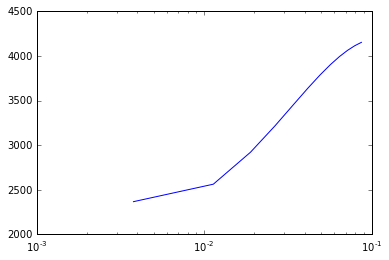

In [79]:
efit = np.exp(fit)
fig, ax = plt.subplots()
ax.plot(r, efit)
ax.set_xscale('log')